In [100]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from setdir import *
from plotglider import *
from scipy.io import loadmat # to load bathymetry
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
yyyymmdd = '20220105'

# Load glider positions
file1 = 'unit_409_positions_'+yyyymmdd+'.pkl'
infile = cat_interim_path(file1)
unit409pos = pd.read_pickle(infile)

file1 = 'unit_398_positions_'+yyyymmdd+'.pkl'
infile = cat_interim_path(file1)
unit398pos = pd.read_pickle(infile)

# Location for bathymetry file
matlab_file = 'labsea_66.44W_45.68N_5min.mat'
input_bathy_file = cat_proc_path(matlab_file)
mat_data = loadmat(input_bathy_file)
bathy_data = mat_data['bathy']
bathylat = bathy_data['lat'][0][0].flatten()
bathylon = bathy_data['lon'][0][0].flatten()
bathy = bathy_data['depth'][0][0]



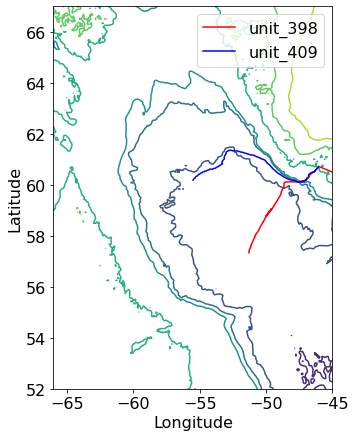

In [5]:
# Map the bathymetry and glider tracks 
# Ok, the glider tracks are spotty: Might mean that the m_gps_lon and m_gps_lat aren't the right variables to download!
map_tracks_pos(bathylon,bathylat,bathy,unit409pos,unit398pos)

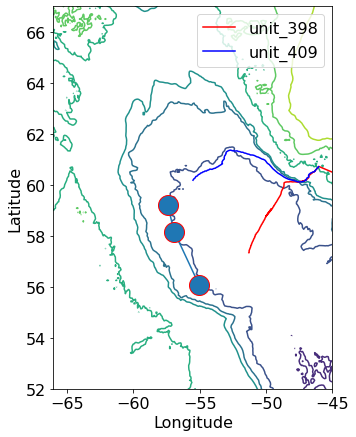

In [96]:
#%matplotlib qt
mpl.use( 'tkagg' )

# Choose axis limits
latlim = [52, 67]
lonlim = [-66, -45]

axes = plt.subplots(nrows=1, ncols=1)
ax1 = plt.subplot(1,1,1)
ax1.contour(bathylon, bathylat, bathy)
ax1.set_ylim(latlim)
ax1.set_xlim(lonlim)
fig = plt.gcf()

unit398pos.plot(x='longitude',y='latitude', color='r', ax=ax1)
unit409pos.plot(x='longitude',y='latitude', color='b', ax=ax1, xlabel='Longitude', ylabel='Latitude')
plt.legend(['unit_398','unit_409'])

xsize = 5
ysize = compute_ysize(xsize, lonlim, latlim)

fig.set_size_inches(xsize, ysize)

# Manually gather waypoints
wp_lon = [-57.410322580645165, 
          -56.91540269173254,
         -55.03118991668447,
         ]
wp_lat = [59.22331011804697,
          58.16601722902724,
         56.06917821384263,
         ]


plt.plot(wp_lon, wp_lat, markersize=20, markeredgecolor="red", marker="o")

save_figure(fig, 'waypoints_5jan2022')
#[wp_next] = plt.ginput(1)

In [97]:
# Clean presentation of waypoints in a table
# https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd
# https://pypi.org/project/tabulate/
from tabulate import tabulate 

info = {'Lon': wp_lon, 'Lat': wp_lat}
print(tabulate(info, headers='keys', showindex=range(1,4)))

         Lon      Lat
--  --------  -------
 1  -57.4103  59.2233
 2  -56.9154  58.166
 3  -55.0312  56.0692


In [102]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros


wp_lon_deg = zerolistmaker(len(wp_lon))
wp_lon_min = zerolistmaker(len(wp_lon))
wp_lon_clean = zerolistmaker(len(wp_lon))

wp_lat_deg = zerolistmaker(len(wp_lon))
wp_lat_min = zerolistmaker(len(wp_lon))
wp_lat_clean = zerolistmaker(len(wp_lon))

for idx, vals in enumerate(wp_lon):
    # longitude
    [degstr, deg1, mindec] = dec2deg(vals)
    dec1 = deg2dec(deg1, mindec)
    
    if vals<0:
        deg1 = -deg1
        dec1 = -dec1

    wp_lon_clean[idx] = dec1
    wp_lon_deg[idx] = deg1
    wp_lon_min[idx] = mindec
    
    
    # latitude
    [degstr, deg1, mindec] = dec2deg(wp_lat[idx])
    dec1 = deg2dec(deg1, mindec)
    
    wp_lat_clean[idx] = dec1
    wp_lat_deg[idx] = deg1
    wp_lat_min[idx] = mindec
    
    

In [104]:
info = {'Lon': wp_lon_clean, 'Lat': wp_lat_clean}
print(tabulate(info, headers='keys', showindex=range(1,4)))

info = {'Lon deg': wp_lon_deg, 'Lon min': wp_lon_min, 'Lat deg': wp_lat_deg, 'Lat min': wp_lat_min}
print(tabulate(info, headers='keys', showindex=range(1,4)))

         Lon      Lat
--  --------  -------
 1  -57.4103  59.2233
 2  -56.9153  58.166
 3  -55.0312  56.0692
      Lon deg    Lon min    Lat deg    Lat min
--  ---------  ---------  ---------  ---------
 1        -57      24.62         59      13.4
 2        -56      54.92         58       9.96
 3        -55       1.87         56       4.15


In [92]:
tabulate.PRESERVE_WHITESPACE = True
print(tabulate(info, headers='keys', tablefmt='text', showindex=range(1,4)))

      Lon deg    Lon min    Lat deg    Lat min
--  ---------  ---------  ---------  ---------
 1        -57      24.62         59      13.4
 2        -56      54.92         58       9.96
 3        -55       1.87         56       4.15
